# K-Means Algorithm

Clustering : K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale. 

In [1]:
#import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys 
import time

In [2]:
df = pd.read_csv('cricketers.csv',sep='\t') #read the csv file seperated by tab character as dilimiter 
df.head() #print first 5 rows 

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [3]:
df.tail() #print last 5 rows to ensure complete read

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
104,Anureet Singh,0,0,0,0,0,0.0,0.0,3,4.0,42,1,42.00,10.50
105,Avesh Khan,0,0,0,0,0,0.0,0.0,6,19.0,204,4,51.00,10.73
106,Barinder Sran,0,0,0,0,0,0.0,0.0,6,22.0,229,4,57.25,10.40
107,Basil Thampi,0,0,0,0,0,0.0,0.0,4,10.1,114,5,22.80,10.20
108,Ben Laughlin,0,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


In [4]:
df.describe() #Get some insight from the given data 

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


In [5]:
df.info() #Get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
PLAYER                      109 non-null object
matches_played              109 non-null int64
innings_batted              109 non-null int64
runs_scored                 109 non-null int64
highest_runs                109 non-null int64
balls_faced                 109 non-null int64
average_runs                109 non-null float64
strike_rate                 109 non-null float64
innings_bowled              109 non-null int64
overs                       109 non-null float64
runs_given                  109 non-null int64
wickets_obtained            109 non-null int64
average_runs_per_wicket     109 non-null float64
bowling_economy             109 non-null float64
dtypes: float64(5), int64(8), object(1)
memory usage: 12.0+ KB


Inference :
    1. Total records : 109
    2. No null values
    3. One nominal value to take care while scaling the dataset

In [6]:
df.columns #Get the column names to be handled for scaling 

Index(['PLAYER', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket ', 'bowling_economy '],
      dtype='object')

In [7]:
#Rename column "bowling_economy " without additional spaces 
df.rename(columns = {'bowling_economy ':'bowling_economy'}, inplace = True)
df.columns

Index(['PLAYER', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket ', 'bowling_economy'],
      dtype='object')

In [8]:
# Normalize using Min-Max Method 
from sklearn.preprocessing import MinMaxScaler #import the required library 
Scaler_MinMax = MinMaxScaler() #Initialize the object

#Drop nominal value and scale between 0 to 1 
scaled_df = pd.DataFrame(Scaler_MinMax.fit_transform(df.drop(['PLAYER'],axis=1),),
                         columns=[ 'matches_played', 'innings_batted', 'runs_scored',
                                   'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
                                   'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
                                   'average_runs_per_wicket ', 'bowling_economy']) 
scaled_df.head() #Print top 5 rows after scaling to see the results

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.0,0.0,0.0,0.0,0.0,0.0


Write your own code for K-means algorithm using two attributes namely average_runs andbowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namelyaverage_runs and bowling_economy, respectively. Color data points belonging to the first cluster withred and the second cluster with blue. Copy the plot diagram in the word document and interpret theoutput.

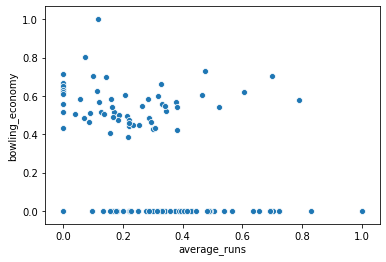

In [9]:
import seaborn as sns #Required library to import the seaborn 
sns.scatterplot(x=scaled_df['average_runs'],y=scaled_df['bowling_economy'],data=scaled_df) #plot Average Runs & Bowling Economy 

    matches_played  innings_batted  runs_scored  highest_runs  balls_faced  \
27        0.941176        0.588235     0.191837       0.53125     0.176357   
92        0.470588        0.235294     0.070748       0.28125     0.089147   

    average_runs  strike_rate  innings_bowled     overs  runs_given  \
27      0.464856     0.516467        0.941176  0.783824    1.000000   
92      0.342872     0.376800        0.470588  0.426471    0.489681   

    wickets_obtained  average_runs_per_wicket   bowling_economy  
27          0.583333                  0.352500         0.603636  
92          0.208333                  0.483333         0.545455  


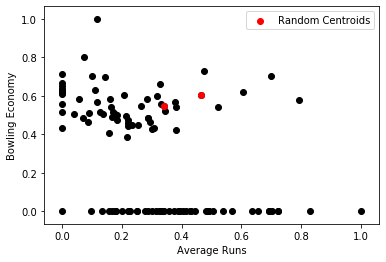

In [10]:
#Visualize how random Centroid selection would like 

k=2 #Number of target clusters = 2


Centroids = scaled_df.sample(n=k) #Select K centroids randomly
print (Centroids) #Print the values

#Plot these samples with above scatter plot
#Visualize using scatter plot
plt.scatter(scaled_df['average_runs'],scaled_df['bowling_economy'],c='black')
plt.scatter(Centroids['average_runs'],Centroids['bowling_economy'],c='red',label = 'Random Centroids')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.legend() 
plt.show()

# Algorithm using K-Means++ logic to select better initial centroids

In [11]:
k=2 #Give the number of clusters you wish to attempt

pd.options.mode.chained_assignment = None #turning off settingwithcopywarning 

# function to plot the selected centroids to visualize how its selected 
def plot(data, centroids): #Take dataset & centroids as input parameter 
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') # Plot the points 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') #Centroids selected previously marked as black
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') #Current centroid selected marked as red
    plt.title('Select % d centroid'%(centroids.shape[0])) #Title 
      
    plt.legend() 
    plt.xlim(-3, 5) 
    plt.ylim(-3, 5) 
    plt.show() 
           
# function to compute euclidean distance or L2 
def distance(p1, p2): 
    return np.sum((p1 - p2)**2)  #p1 & P2 are input points and calculating Euclidean distance
   
# initialization algorithm 
def initialize(data, k): 
    #initialize the centroids list and add a randomly selected data point to the list 
    centroids = [] #Initialize List to get to best possible centroids 
    centroids.append(data[np.random.randint(data.shape[0]), :])  #Starts with the random guess from given data set
    plot(data, np.array(centroids))  #Plot this centroid and data set to get the visualization
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): #Get the remaining k -1 centroids 
        #initialize a list to store distances of data points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] #Get the point from dataset
            d = sys.maxsize #initilize the distance d with maximum number 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): #Loop with all available set of centroids 
                temp_dist = distance(point, centroids[j])  #Calculate the distance between selected point & centroid
                d = min(d, temp_dist)  #Get the minimum distance 
            dist.append(d)  #Store the minimum distance into the list
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] #Get the next centroid with farthest distance 
        centroids.append(next_centroid)  #Store next centroid into list 
        dist = [] #Reset the distance list 
        plot(data, np.array(centroids))  #Plot the next discovered centriods to visualize 
    return centroids #Return the required number of centriods from initialization function 

# Function to get K clusters and use KMeans++ for initial centroid selection
def K_Means_Algo_KMeanPlusPlus(k,scaled_data):
    pd.options.mode.chained_assignment = None #turning off settingwithcopywarning 

    #Select k centroids 
    # call the initialize function to get the centroids for KMeans++ 
    Centroids_numpy = initialize(scaled_data.to_numpy(), k) #Call initilialize function to get k required centroids 
    Centroids = pd.DataFrame(data=Centroids_numpy,columns=["average_runs", "bowling_economy"]) #create the dataframe for centroids 
    print ("Random Centroid Value using KMeans++ method")
    print(Centroids) #Print the evaluated initial centroids from K-Means++ way

    distance = 1 #initialize the distance 
    j=0 
    t0 = time.time() #Get the current time to calculate the total time  for algorithm 
    while (distance != 0): #Loop till cost function reduces to 0 
        current=scaled_data  
        i=1
        for idx, val1 in Centroids.iterrows(): #Loop thru available centriods 
            L2_distances=[] #List of euclidean distance 
            for idx_data,val2 in current.iterrows(): #Traverse thru all the data points for val1 centroid
                #calulate the L2-Norm between Centroid & each data point
                distance
                d1=(val1["average_runs"] - val2["average_runs"])**2  #d1 : distance between centroid point & selected point for first col
                d2=(val1["bowling_economy"] - val2["bowling_economy"])**2 #d2 : distance between centroid point & selected point for first col
                L2_distance=np.sqrt(d1+d2) #Sqrt of about two distance d1 & d2
                L2_distances.append(L2_distance) #Store the distance into list 
            scaled_data[i]=L2_distances #Write the distances as new column into dataset
            i=i+1 #Increment counter for next column if required to append 
        #print ("Distances between centroids & each data point")
        #print (data) 

        C=[] #List assign Centroids to data point 

        for index,row in scaled_data.iterrows(): #Traverse thru daaset
            min_dist=row[1]
            pos=1
            for i in range(k): #Traverse thru k centroids to get the centriod with minimum distance
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos) #Store the assigned centriod 

        scaled_data["Cluster"]=C #Add Centroid Column to the dataset
        Centroids_new = scaled_data.groupby(["Cluster"]).mean()[["average_runs","bowling_economy"]] #Get the new centroids 
        if j == 0: #First time with one centroid 
            distance=1
            j=j+1
        else: #Calculate the difference between old & new centroids 
            distance = (
                        (Centroids_new['average_runs'] - Centroids['average_runs']).sum() +
                        (Centroids_new['bowling_economy'] - Centroids['bowling_economy']).sum()
            )
            #print(distance)

        Centroids = scaled_data.groupby(["Cluster"]).mean()[["average_runs","bowling_economy"]] #Update the Centroids & loop again

    t_batch = time.time() - t0 #End time from while loop
    print ("Time to get Cluster", t_batch) #Print the time taken 

    #Assign the colors based on cluster count
    if (k==2):
        color = ['red','blue']
    elif (k==3):
        color = ['red','blue','green']
    elif (k==4):
        color = ['red','blue','green','dodgerblue']
    elif (k==5):
        color = ['red','blue','green','dodgerblue','brown']
    for k in range(k):
        dataset=scaled_data[scaled_data["Cluster"]==k+1] #K starts from 0 to k+1
        plt.scatter(dataset["average_runs"],dataset["bowling_economy"],c=color[k]) #Print the scatter plot
    plt.scatter(Centroids["average_runs"],Centroids["bowling_economy"],c='black',s=80,marker="s",label = 'Centroid') #Print the Centroids Obtained
    plt.xlabel('Average Runs') #Give x-axis label
    plt.ylabel('Bowling Economy')#Give y-axis label
    plt.legend() 
    plt.title('K-Means Clustering with %d centroid using K_Means++ Initialiation'%(Centroids.shape[0])) #Title 
    plt.show()#Show the results of clustering

# Algorithm using random initial centroids selection

In [12]:
# Function to get K clusters and use random selection for initial centroid selection
def K_Means_Algo_Random(k,scaled_data):
    #scaled_data = scaled_df[["average_runs","bowling_economy"]] #Consider 2 columns from scaled dataset
    #Select k centroids 

    Centroids = scaled_data.sample(n=k) #Call Random method for Random selection 
    print ("Random Centroid Value ")
    print(Centroids)

    distance = 1 #initialize the distance 
    j=0 
    t0 = time.time() #Get the current time to calculate the total time  for algorithm 
    while (distance != 0): #Loop till cost function reduces to 0 
        current=scaled_data  
        i=1
        for idx, val1 in Centroids.iterrows(): #Loop thru available centriods 
            L2_distances=[] #List of euclidean distance 
            for idx_data,val2 in current.iterrows(): #Traverse thru all the data points for val1 centroid
                #calulate the L2-Norm between Centroid & each data point
                distance
                d1=(val1["average_runs"] - val2["average_runs"])**2  #d1 : distance between centroid point & selected point for first col
                d2=(val1["bowling_economy"] - val2["bowling_economy"])**2 #d2 : distance between centroid point & selected point for first col
                L2_distance=np.sqrt(d1+d2) #Sqrt of about two distance d1 & d2
                L2_distances.append(L2_distance) #Store the distance into list 
            scaled_data[i]=L2_distances #Write the distances as new column into dataset
            i=i+1 #Increment counter for next column if required to append 
        #print ("Distances between centroids & each data point")
        #print (data) 

        C=[] #List assign Centroids to data point 

        for index,row in scaled_data.iterrows(): #Traverse thru daaset
            min_dist=row[1]
            pos=1
            for i in range(k): #Traverse thru k centroids to get the centriod with minimum distance
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos) #Store the assigned centriod 

        scaled_data["Cluster"]=C #Add Centroid Column to the dataset
        Centroids_new = scaled_data.groupby(["Cluster"]).mean()[["average_runs","bowling_economy"]] #Get the new centroids 
        if j == 0: #First time with one centroid 
            distance=1
            j=j+1
        else: #Calculate the difference between old & new centroids 
            distance = (
                        (Centroids_new['average_runs'] - Centroids['average_runs']).sum() +
                        (Centroids_new['bowling_economy'] - Centroids['bowling_economy']).sum()
            )
            #print(distance)

        Centroids = scaled_data.groupby(["Cluster"]).mean()[["average_runs","bowling_economy"]] #Update the Centroids with new Mean & loop again

    t_batch = time.time() - t0 #End time from while loop
    print ("Time to get Cluster", t_batch) #Print the time taken 

    #Assign the colors based on cluster count
    if (k==2):
        color = ['red','blue']
    elif (k==3):
        color = ['red','blue','green']
    elif (k==4):
        color = ['red','blue','green','dodgerblue']
    elif (k==5):
        color = ['red','blue','green','dodgerblue','brown']
    for k in range(k):
        dataset=scaled_data[scaled_data["Cluster"]==k+1] #K starts from 0 to k+1
        plt.scatter(dataset["average_runs"],dataset["bowling_economy"],c=color[k]) #Print the scatter plot
    plt.scatter(Centroids["average_runs"],Centroids["bowling_economy"],c='black',s=80,marker="s",label = 'Centroid') #Print the Centroids Obtained
    plt.xlabel('Average Runs') #Give x-axis label
    plt.ylabel('Bowling Economy')#Give y-axis label
    plt.legend() 
    plt.title('K-Means Clustering with %d centroid'%(Centroids.shape[0])) #Title 
    plt.show()#Show the results of clustering
    
    

Random Centroid Value 
    average_runs  bowling_economy
60      0.164842         0.542424
98      0.380852         0.424242
Time to get Cluster 0.4313228130340576


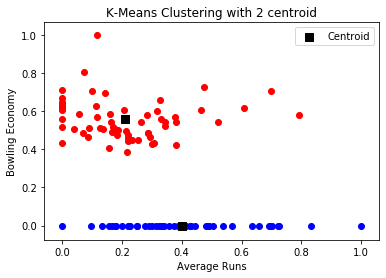

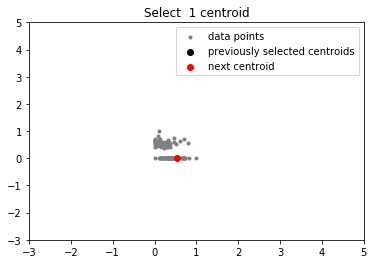

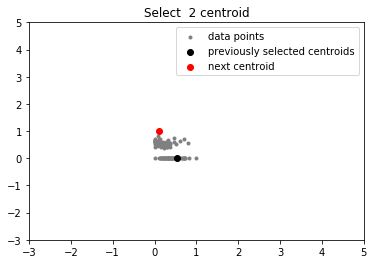

Random Centroid Value using KMeans++ method
   average_runs  bowling_economy
0      0.539101              0.0
1      0.116049              1.0
Time to get Cluster 0.28272294998168945


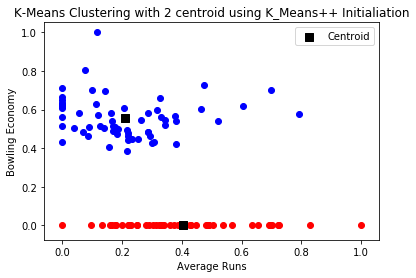

In [13]:
scaled_data = scaled_df[["average_runs","bowling_economy"]] #Consider 2 columns from scaled dataset
K_Means_Algo_Random(2,scaled_data)

scaled_data = scaled_df[["average_runs","bowling_economy"]] #Consider 2 columns from scaled dataset
K_Means_Algo_KMeanPlusPlus(2,scaled_data)

# For different values of K = 2,3,4,5. For each case, lets draw the plot of clusters.

Random Centroid Value 
    average_runs  bowling_economy
23      0.487934         0.000000
67      0.219702         0.476364
Time to get Cluster 0.2976536750793457


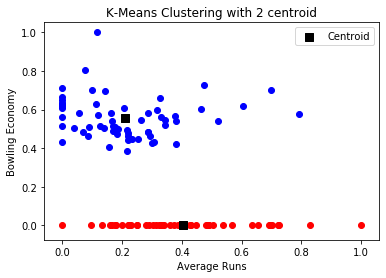

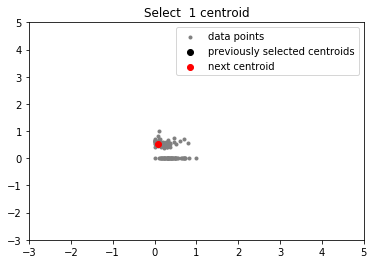

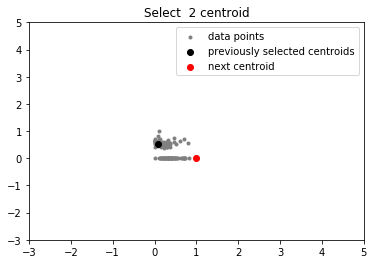

Random Centroid Value using KMeans++ method
   average_runs  bowling_economy
0      0.089015         0.509091
1      1.000000         0.000000
Time to get Cluster 0.5780808925628662


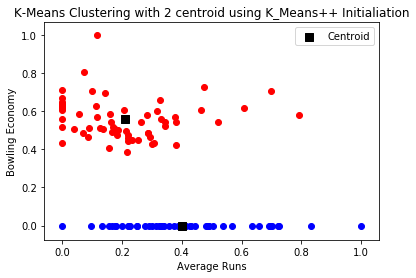

Random Centroid Value 
    average_runs  bowling_economy
87      0.446130         0.000000
98      0.380852         0.424242
81      0.000000         0.559394
Time to get Cluster 0.2942037582397461


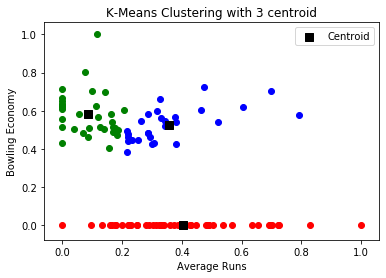

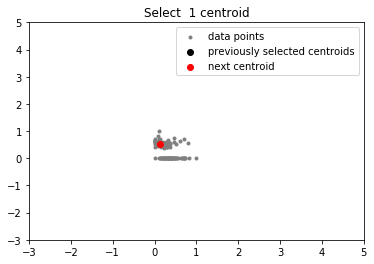

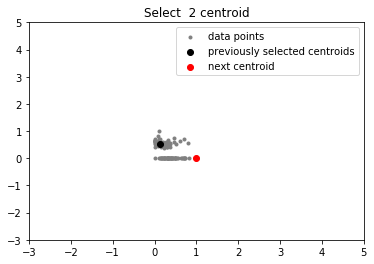

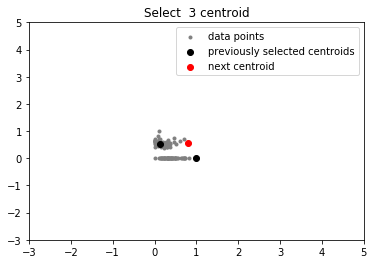

Random Centroid Value using KMeans++ method
   average_runs  bowling_economy
0      0.127390         0.513939
1      1.000000         0.000000
2      0.791244         0.578182
Time to get Cluster 0.44995975494384766


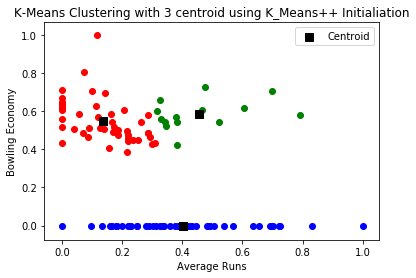

Random Centroid Value 
     average_runs  bowling_economy
101      0.000000         0.432121
19       0.166161         0.000000
66       0.331267         0.000000
77       0.415403         0.000000
Time to get Cluster 0.8175063133239746


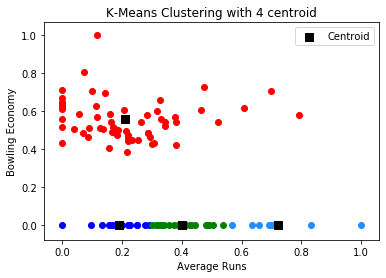

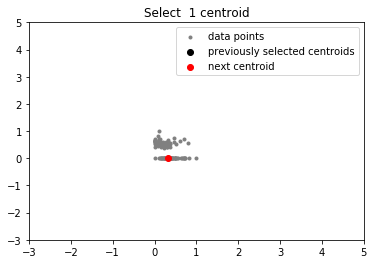

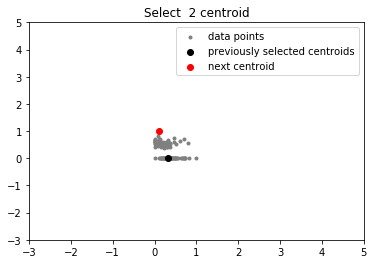

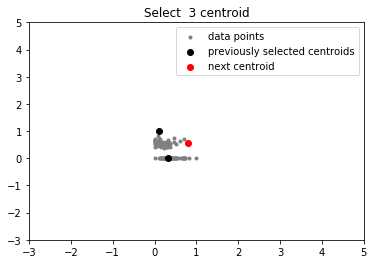

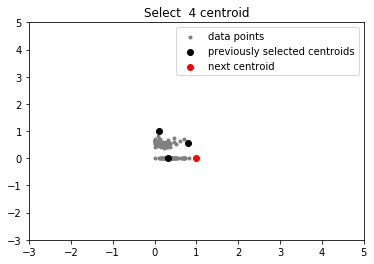

Random Centroid Value using KMeans++ method
   average_runs  bowling_economy
0      0.325201         0.000000
1      0.116049         1.000000
2      0.791244         0.578182
3      1.000000         0.000000
Time to get Cluster 0.7173357009887695


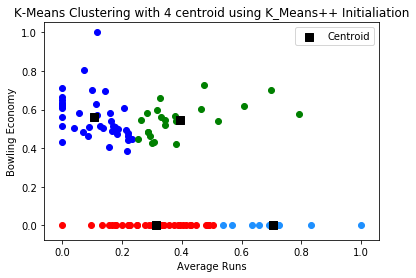

Random Centroid Value 
    average_runs  bowling_economy
75      0.314256         0.000000
80      0.522748         0.543030
66      0.331267         0.000000
11      0.085718         0.464242
56      0.138468         0.506667
Time to get Cluster 1.0811290740966797


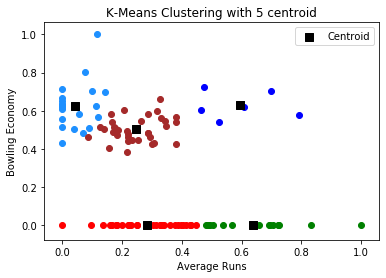

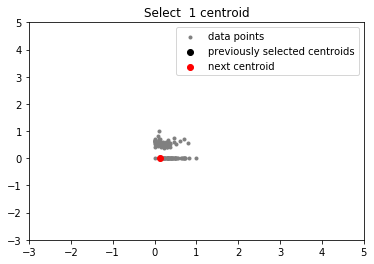

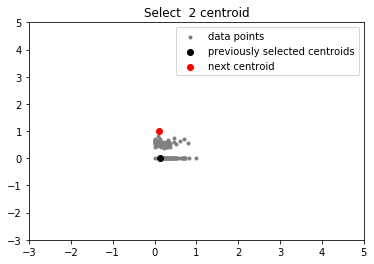

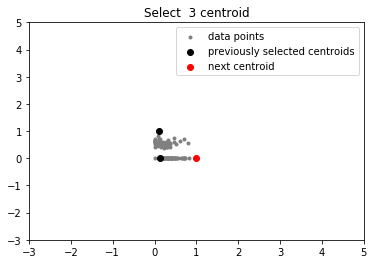

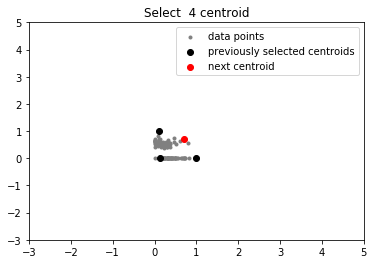

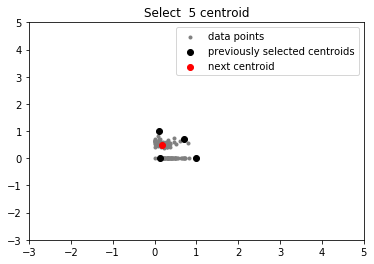

Random Centroid Value using KMeans++ method
   average_runs  bowling_economy
0      0.134511          0.00000
1      0.116049          1.00000
2      1.000000          0.00000
3      0.698932          0.70303
4      0.185678          0.50000
Time to get Cluster 1.2313356399536133


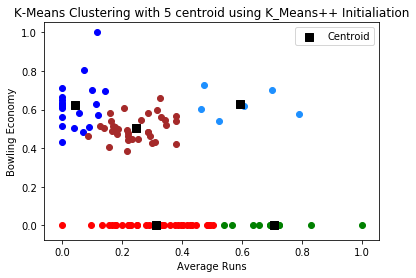

In [14]:
k=2 #Doing clustering both ways Random & Using KMeans++ for K=2,3,4,5
while(k<=5):
    scaled_data = scaled_df[["average_runs","bowling_economy"]] #Consider 2 columns from scaled dataset
    K_Means_Algo_Random(k,scaled_data)

    scaled_data = scaled_df[["average_runs","bowling_economy"]] #Consider 2 columns from scaled dataset
    K_Means_Algo_KMeanPlusPlus(k,scaled_data)
    
    k=k+1